<a href="https://colab.research.google.com/github/sushma-snk/SuperMarket-Data-Wrangling/blob/main/supermarket_sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Step 1: Import libraries needed

Step 2: Import input data

Step 3: Preprocess the data

Step 4: Check for missing or null data , handle the missing data

Step 5: Visualize the each column in plotting after handling missing issues 

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Import required libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load dataset

In [3]:
file_name = "/gdrive/My Drive/unikaksha/mini_projects/supermarket_sales/supermarket_sales.csv"
data = pd.read_csv(file_name)
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Check for missing data

In [5]:
data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

Dataset contains no missing data

Data Visualization

a. Gender Count

<Axes: title={'center': 'Gender Count'}, xlabel='Gender', ylabel='count'>

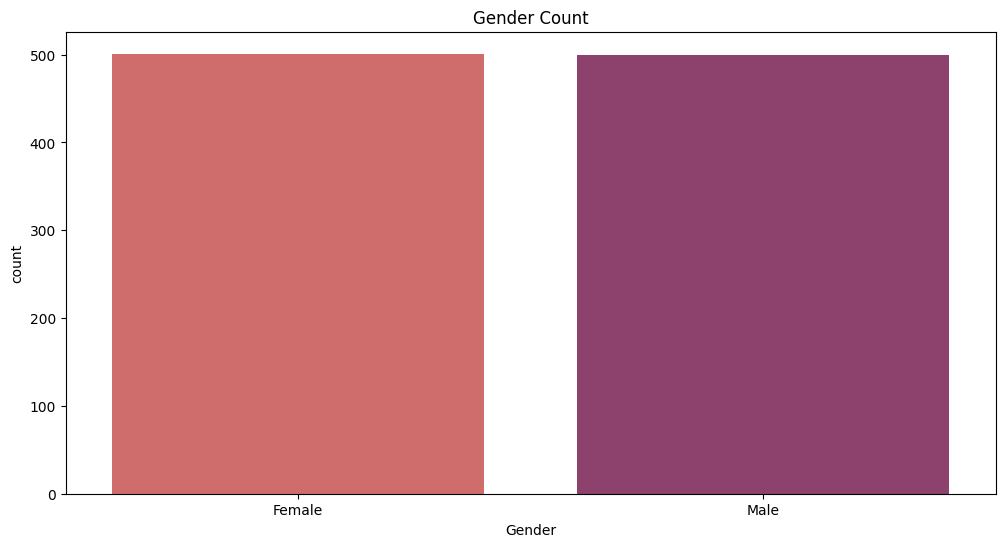

In [6]:
plt.figure(figsize=(12,6))
plt.title("Gender Count")
sns.countplot(data=data, x='Gender', palette='flare')

b. Customer Type Count

<Axes: title={'center': 'Customer Type'}, xlabel='Customer type', ylabel='count'>

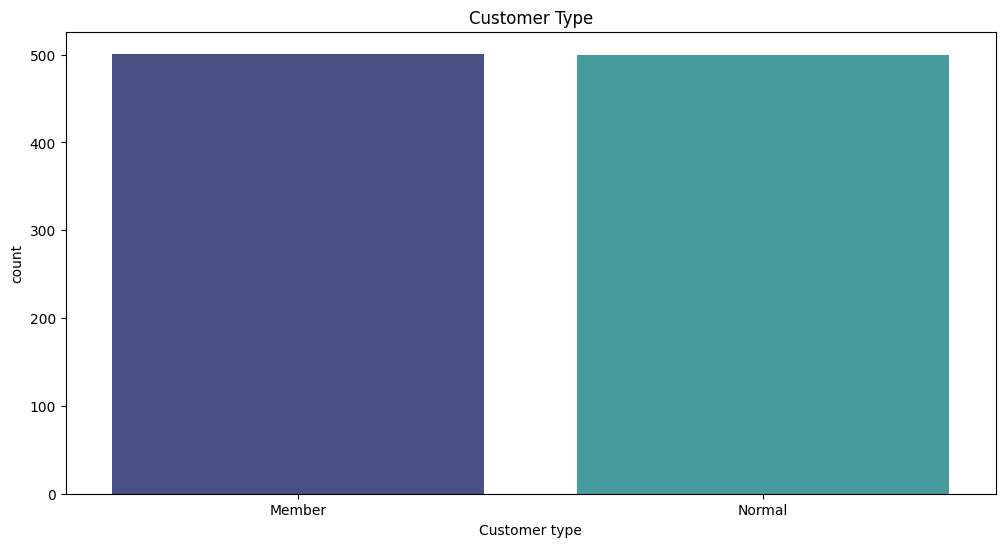

In [7]:
plt.figure(figsize=(12,6))
plt.title("Customer Type")
sns.countplot(data=data, x='Customer type', palette = 'mako')

c. Mode of payment

<Axes: title={'center': 'Mode of payment'}, xlabel='Payment', ylabel='count'>

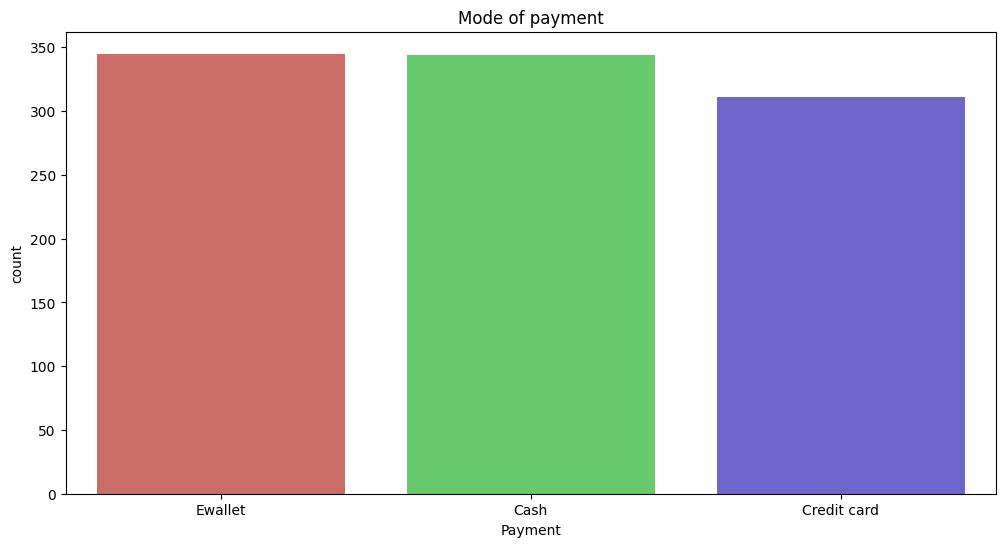

In [8]:
plt.figure(figsize=(12,6))
plt.title("Mode of payment")
sns.countplot(data=data, x='Payment',palette = "hls")

d. Customer Type

([<matplotlib.patches.Wedge at 0x7f983a9aa820>,
 [Text(-0.003455701743252077, 1.099994571861817, 'Member'),
  Text(0.003455701743251942, -1.099994571861817, 'Normal')],
 [Text(-0.0018849282235920417, 0.5999970391973546, '50.1%'),
  Text(0.0018849282235919682, -0.5999970391973546, '49.9%')])

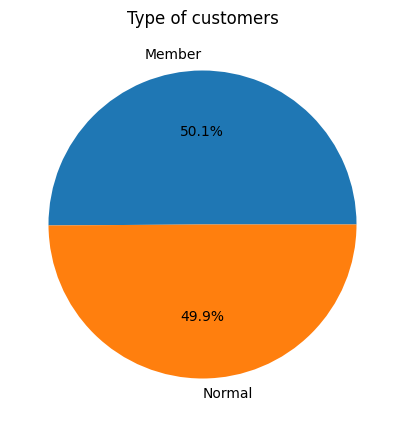

In [9]:
plt.figure(figsize=(8,5))
plt.title("Type of customers")
plt.pie(data['Customer type'].value_counts(), labels=data['Customer type'].value_counts().index, autopct='%1.1f%%')

e. Branch-wise profit

In [10]:
branch_profit = data.groupby("Branch")[["gross income"]].sum()
branch_profit

,gross income
Branch,
A,5057.1605
B,5057.0320
C,5265.1765


<Axes: title={'center': 'Branch-wise Profit'}, xlabel='Branch', ylabel='gross income'>

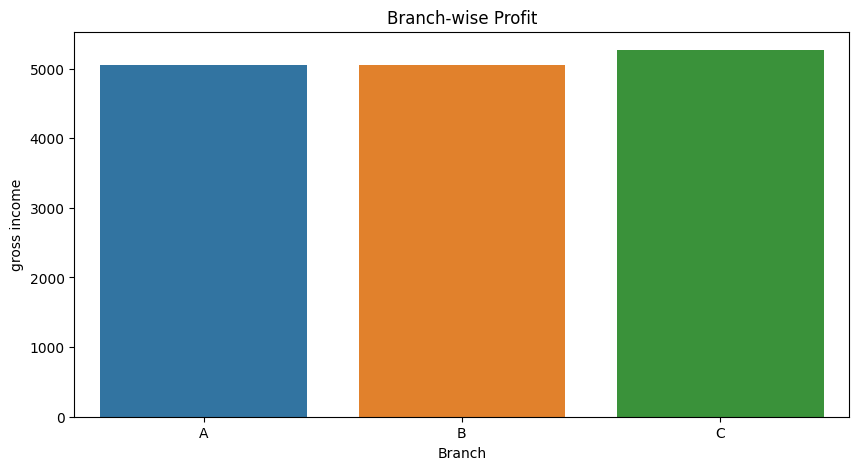

In [11]:
plt.figure(figsize=(10, 5))
plt.title("Branch-wise Profit")
sns.barplot(x=branch_profit.index,y= branch_profit['gross income'])

f. Number of purchases

<Axes: title={'center': 'Number of Poduct line purchases'}, xlabel='Product line', ylabel='Count'>

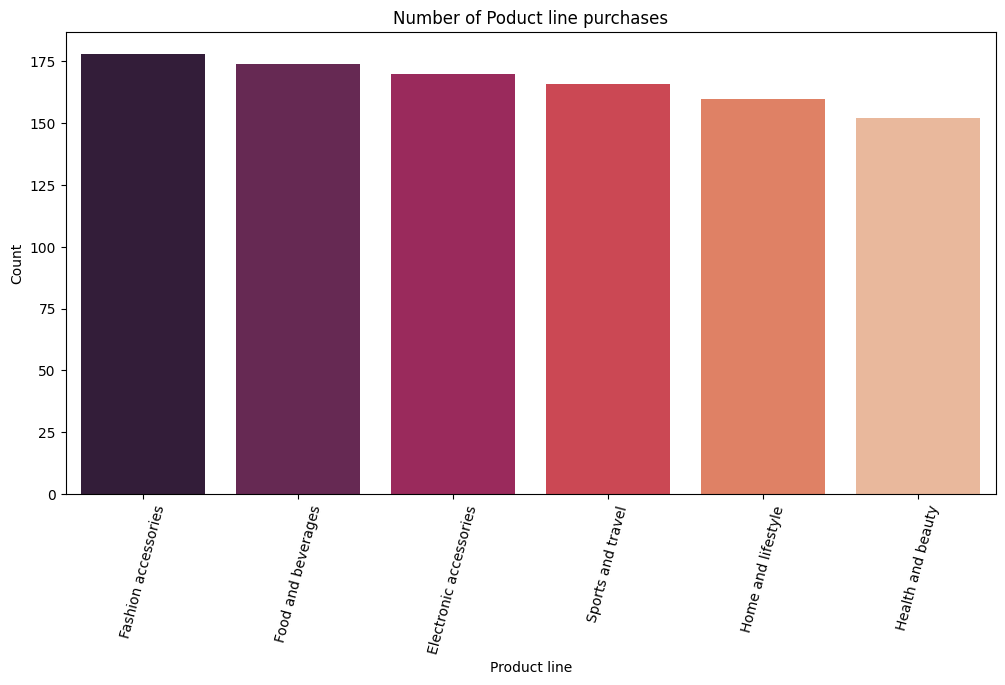

In [12]:
product_line_count = data['Product line'].value_counts().reset_index()
product_line_count.columns=['Product line','Count']

plt.figure(figsize=(12,6))
plt.title("Number of Poduct line purchases")
plt.xticks(rotation = 75)
plt.ylabel("Count")
sns.barplot(data=product_line_count, x= "Product line",y='Count', palette="rocket")

g. Rating

<Axes: title={'center': 'Shopping Experience Rating'}, xlabel='Rating', ylabel='Count'>

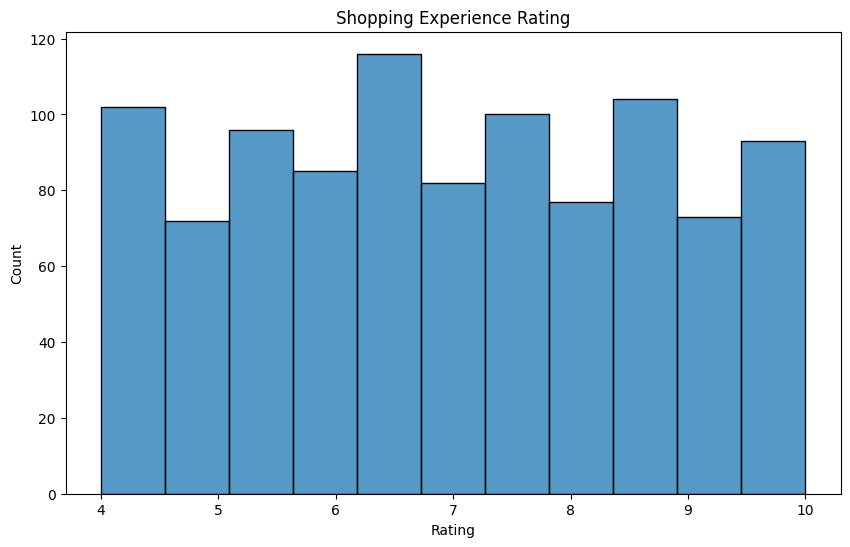

In [13]:
plt.figure(figsize=(10,6))
plt.title("Shopping Experience Rating")
sns.histplot(data.Rating)

h. Quantity purchased - Product-wise

In [14]:
Quantity_purchased = data.groupby("Product line")[["Unit price", 'Quantity']].sum()
Quantity_purchased

,Unit price,Quantity
Product line,,
Electronic accessories,9103.77,971
Fashion accessories,10173.35,902
Food and beverages,9745.54,952
Health and beauty,8337.88,854
Home and lifestyle,8850.71,911
Sports and travel,9460.88,920


<Axes: xlabel='Unit price', ylabel='Quantity'>

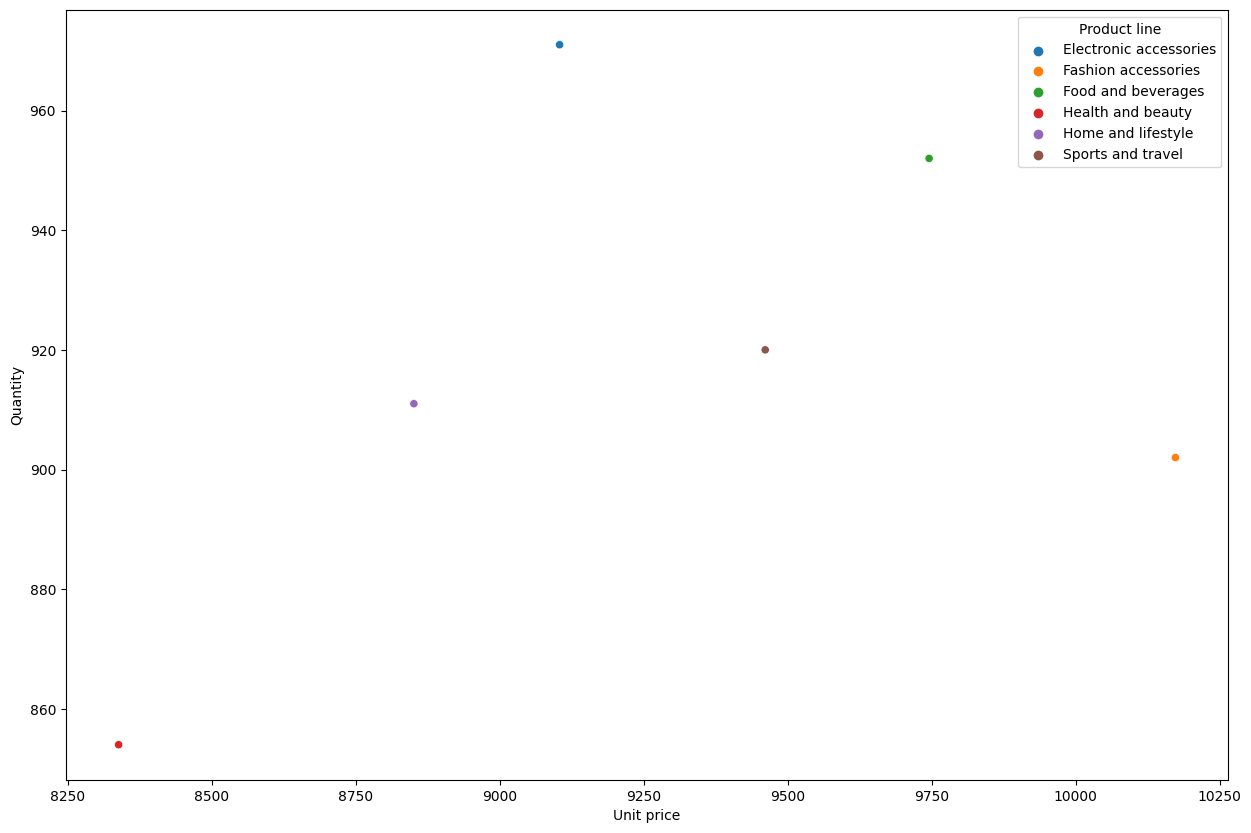

In [15]:
plt.figure(figsize=(15,10))
sns.scatterplot(data=Quantity_purchased,x='Unit price', y="Quantity", hue='Product line')

i. Unit Price

<ipython-input-16-d02a0a10f919>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['Unit price'],kde=True)


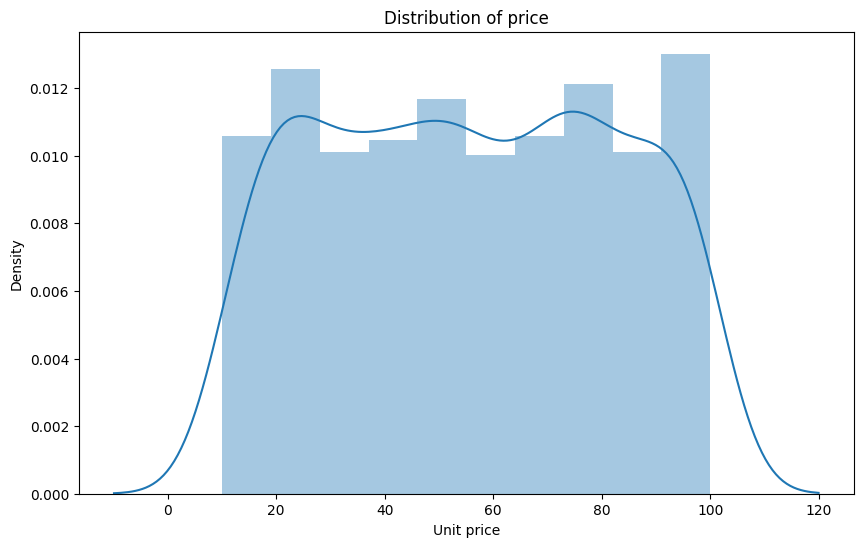

In [16]:
plt.figure(figsize=(10,6))
plt.title('Distribution of price')
sns.distplot(data['Unit price'],kde=True)
plt.show()

j. City-wise sales count

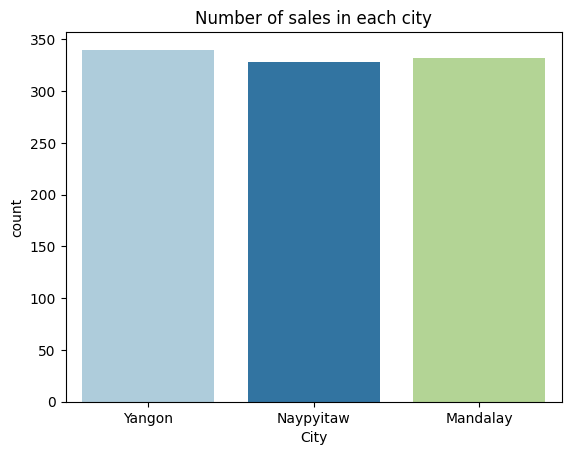

In [17]:
plt.title('Number of sales in each city')
sns.countplot(data=data, x="City", palette='Paired');

k. Quantity Purchased

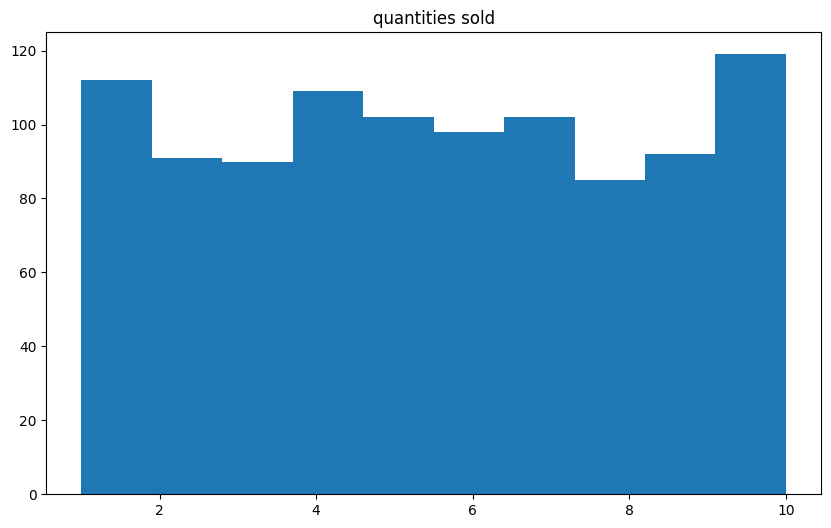

In [18]:
plt.figure(figsize=(10,6))
plt.title("quantities sold")
plt.hist(data['Quantity'])
plt.show()